## 2. Face Emotion Classification with Kernel Classifier

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

##############################################################
# Gaussian Kernel with Squared Error Loss and L2 Regularizer #
##############################################################
sigma = 5
lam = 0.5

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y

dtest = np.exp(-distsq/(2*sigma**2))@alpha

yhat_k = np.sign(dtest)
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat_k, y))]
print("Kernel Clasifier:")
print("Errors: ", sum(error_vec))
print("Error rate: ", sum(error_vec)/np.size(yhat_k))


# ######################
# # Squared Error Only #
# ######################
# w_opt_sq = np.linalg.inv(X.T@X)@X.T@y
# print(w_opt_sq)
# yhat_sq = np.sign(X@w_opt_sq)
# error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((yhat_sq, y))]
# print("Squared Error Loss Function:")
# print("Errors: ", sum(error_vec))
# print("Error rate: ", sum(error_vec)/np.size(yhat_sq))

# #######################
# # L2 regularizer Only #
# #######################
# I = np.eye(X.shape[1])
# lam = 0.5
# LI = np.multiply(I,lam)
# w_opt_l2 = np.linalg.inv((X.T@X) + LI)@X.T@y
# print(w_opt_l2)
# yhat_l2 = np.sign(X@w_opt_l2)
# error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y, yhat_l2))]
# print("L2 Regularizer:")
# print("Errors: ", sum(error_vec))
# print("Error rate: ", sum(error_vec)/np.size(yhat_l2))

Kernel Clasifier:
Errors:  1
Error rate:  0.0078125


### b)
Yes, this classifier does achieve 0 error for small values of sigma when trained/tested on the same data. The plot appears to be similar to a step function, increasing in error rate as we surpass a certain threashold of sigma (like at sigma=2 for example). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
X = np.hstack((np.ones((n,1)), X))  # append a column of ones
n, p = np.shape(X)

errors = np.zeros(50)
sigmas = np.zeros(50)

##############################################################
# Gaussian Kernel with Squared Error Loss and L2 Regularizer #
##############################################################
for k in range (50):
    sigma = (k+1)/5
    sigmas[k] = sigma
    lam = 0.5

    distsq=np.zeros((n,n),dtype=float)

    for i in range(0,n):
        for j in range(0,n):
            d = np.linalg.norm(X[i,:]-X[j,:])
            distsq[i,j]=d**2

    K = np.exp(-distsq/(2*sigma**2))

    alpha = np.linalg.inv(K+lam*np.identity(n))@y

    dtest = np.exp(-distsq/(2*sigma**2))@alpha

    yhat_k = np.sign(dtest)
    error = (sum([0 if i[0]==i[1] else 1 for i in np.hstack((yhat_k, y))]))/np.size(yhat_k)
    errors[k] = error
    
print(errors)
print(sigmas)



[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.015625  0.0234375 0.0234375
 0.0234375 0.0234375 0.0234375 0.0234375 0.0234375 0.0234375 0.0390625
 0.0390625 0.0390625 0.0390625 0.0390625 0.0390625 0.046875  0.046875
 0.046875 ]
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]


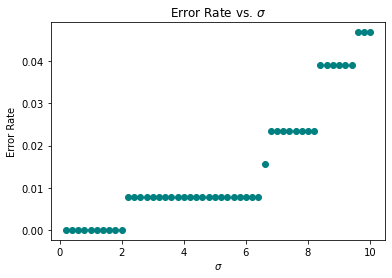

In [3]:
plt.scatter(sigmas, errors, c = 'teal')
plt.title('Error Rate vs. $\sigma$')
plt.xlabel("$\sigma$")
plt.ylabel("Error Rate")
plt.show()

### c)
No, we cannot achieve perfect accuracy with sigma from 0.01 to 0.1

In [4]:
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

it = 10
total_error = np.zeros(it)
sigmas = np.zeros(it)

for b in range(it):
    sigma = (b + 1)
    sigmas[b] = sigma

    kf = KFold(n_splits=8)
    kf.get_n_splits(X)
    errors = np.zeros(8)

    #print(kf)
    k = 0
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        n, p = np.shape(X_train)

        lam = 0.5

        # compute Kernel for training data
        distsq=np.zeros((n,n),dtype=float)
        for i in range(0,n):
            for j in range(0,n):
                d = np.linalg.norm(X_train[i,:]-X_train[j,:])
                distsq[i,j]=d**2

        K = np.exp(-distsq/(2*sigma**2))
        alpha = np.linalg.inv(K+lam*np.identity(n))@y_train


        error_test = 0
        for q in range(16):
            yhat_i = 0
            x_i = X_test[q]
            y_i = y_test[q]
            for l in range(112):
                dist = np.linalg.norm(x_i-X_train[l,:])
                kernel = np.exp(-dist**2/(2*sigma**2))
                yhat_i += kernel * np.squeeze(alpha[l])
            error_test += np.sign(yhat_i) == y_i

        errors[k] = error_test/y_test.size
        print(errors[k])
        k = k+1
    print("Sigma: ", sigma, " Lambda: ", lam, " Error Rates: ", errors)
    total_error[b] = np.sum(errors)/8

print("Total Error Rates: ", total_error)

0.75
1.0
0.875
0.75
1.0
1.0
1.0
0.9375
Sigma:  1  Lambda:  0.5  Error Rates:  [0.75   1.     0.875  0.75   1.     1.     1.     0.9375]
0.75
1.0
0.9375
0.875
1.0
1.0
1.0
0.9375
Sigma:  2  Lambda:  0.5  Error Rates:  [0.75   1.     0.9375 0.875  1.     1.     1.     0.9375]
0.75
1.0
0.875
0.9375
1.0
1.0
1.0
1.0
Sigma:  3  Lambda:  0.5  Error Rates:  [0.75   1.     0.875  0.9375 1.     1.     1.     1.    ]
0.8125
1.0
0.9375
0.9375
1.0
1.0
1.0
1.0
Sigma:  4  Lambda:  0.5  Error Rates:  [0.8125 1.     0.9375 0.9375 1.     1.     1.     1.    ]
0.8125
1.0
0.9375
0.9375
1.0
1.0
1.0
1.0
Sigma:  5  Lambda:  0.5  Error Rates:  [0.8125 1.     0.9375 0.9375 1.     1.     1.     1.    ]
0.8125
1.0
0.9375
0.875
1.0
1.0
1.0
1.0
Sigma:  6  Lambda:  0.5  Error Rates:  [0.8125 1.     0.9375 0.875  1.     1.     1.     1.    ]
0.8125
1.0
0.9375
0.875
1.0
1.0
1.0
1.0
Sigma:  7  Lambda:  0.5  Error Rates:  [0.8125 1.     0.9375 0.875  1.     1.     1.     1.    ]
0.8125
1.0
0.9375
0.875
1.0
1.0
1.0
1.0
S

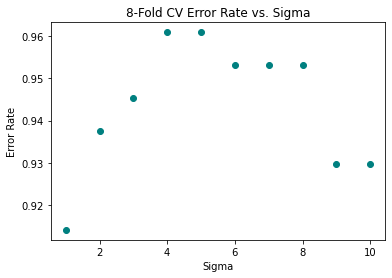

In [5]:
plt.scatter(sigmas, total_error, c = 'teal')
plt.title('8-Fold CV Error Rate vs. Sigma')
plt.xlabel("Sigma")
plt.ylabel("Error Rate")
plt.show()